In [58]:
import numpy as np
import pandas as pd

lead_highgrove = pd.read_csv(filepath_or_buffer="C:\\Users\\118183\\Documents\\2019\\Model\\Lead_Conversion\\HighGrove_01012020_29062021.csv")

In [59]:
lead_highgrove.head()

,Enquiry: Created Date,Enquiry Status,Original Source,Enquiry Source,Enquiry: Last Modified Date,CP Name,CP Organisation Name,Project Name,Primary contact Name,Enquiry: Enquiry ID,Mobile
0,11/2/2020,Closed/ Lost,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
1,23/9/2020,Closed/ Lost,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842
2,20/10/2020,Closed/ Lost,Hoarding,Hoarding,22/2/2021,NaN,NaN,Arvind Highgrove,Mr. Daheri Lal,ENQ - 00114748,916353205443
3,11/2/2020,Closed/ Lost,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
4,23/9/2020,Closed/ Lost,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842


In [60]:
lead_highgrove.columns

Index(['Enquiry: Created Date', 'Enquiry Status', 'Original Source',
       'Enquiry Source', 'Enquiry: Last Modified Date', 'CP Name',
       'CP Organisation Name', 'Project Name', 'Primary contact Name',
       'Enquiry: Enquiry ID', 'Mobile'],
      dtype='object')

In [61]:
lead_highgrove.rename(columns={'Enquiry: Created Date': 'enq_created_date'}, inplace=True)

In [62]:
lead_highgrove.rename(columns={'Enquiry Status':'enq_status','Original Source':'orginal_source','Enquiry Source':'enq_source', 'Enquiry: Last Modified Date':'enq_last_modified_date','CP Name':'CP_Name','CP Organisation Name':'CP_org_name','Project Name':'project','Primary contact Name':'customer_name','Enquiry: Enquiry ID':'enq_id','Mobile':'mobile'}, inplace=True)

In [63]:
lead_highgrove.head()

,enq_created_date,enq_status,orginal_source,enq_source,enq_last_modified_date,CP_Name,CP_org_name,project,customer_name,enq_id,mobile
0,11/2/2020,Closed/ Lost,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
1,23/9/2020,Closed/ Lost,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842
2,20/10/2020,Closed/ Lost,Hoarding,Hoarding,22/2/2021,NaN,NaN,Arvind Highgrove,Mr. Daheri Lal,ENQ - 00114748,916353205443
3,11/2/2020,Closed/ Lost,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
4,23/9/2020,Closed/ Lost,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842


In [64]:
lead_highgrove['enq_status'].nunique()

13

In [65]:
lead_highgrove['enq_status'].unique()

array(['Closed/ Lost', 'Site Visit Conducted', 'Closed Won',
       'Active - Presales', 'Working', 'Active - Sales',
       'Active - CP Sales', 'Booked', 'Converted to Offer',
       'Site Visit Scheduled', 'Pre Closer Stage', 'Closed by Sales',
       'Site Visit Rescheduled', nan], dtype=object)

In [66]:
filtercondition1 = lead_highgrove['enq_status'].isin(['Closed/ Lost']).values
filtercondition2 = lead_highgrove['enq_status'].isin(['Closed by Sales']).values
filtercondition3 = lead_highgrove['enq_status'].isin(['Closed Won']).values

lead_highgrove_status = lead_highgrove[filtercondition1 | filtercondition2 | filtercondition3]

In [67]:
lead_highgrove_status.head()

,enq_created_date,enq_status,orginal_source,enq_source,enq_last_modified_date,CP_Name,CP_org_name,project,customer_name,enq_id,mobile
0,11/2/2020,Closed/ Lost,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
1,23/9/2020,Closed/ Lost,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842
2,20/10/2020,Closed/ Lost,Hoarding,Hoarding,22/2/2021,NaN,NaN,Arvind Highgrove,Mr. Daheri Lal,ENQ - 00114748,916353205443
3,11/2/2020,Closed/ Lost,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
4,23/9/2020,Closed/ Lost,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842


In [68]:
lead_highgrove_status['enq_status'].unique()

array(['Closed/ Lost', 'Closed Won', 'Closed by Sales'], dtype=object)

In [69]:
lead_highgrove_status['enq_status'].replace({'Closed/ Lost':0,'Closed by Sales':0, 'Closed Won':1}, inplace=True)

C:\Users\118183\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
print(lead_highgrove_status.shape)

lead_highgrove_status.drop_duplicates()

print(lead_highgrove_status.shape)

(42134, 11)
(42134, 11)


In [71]:
lead_highgrove_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42134 entries, 0 to 49014
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enq_created_date        42134 non-null  object
 1   enq_status              42134 non-null  int64 
 2   orginal_source          41426 non-null  object
 3   enq_source              41709 non-null  object
 4   enq_last_modified_date  42134 non-null  object
 5   CP_Name                 1366 non-null   object
 6   CP_org_name             1375 non-null   object
 7   project                 42134 non-null  object
 8   customer_name           42134 non-null  object
 9   enq_id                  42134 non-null  object
 10  mobile                  42133 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.9+ MB


In [72]:
lead_highgrove_status.describe(include='all')

,enq_created_date,enq_status,orginal_source,enq_source,enq_last_modified_date,CP_Name,CP_org_name,project,customer_name,enq_id,mobile
count,42134,42134.000000,41426,41709,42134,1366,1375,42134,42134,42134,42133
unique,294,NaN,26,20,292,79,66,1,8603,10206,9104
top,19/9/2020,NaN,Facebook,Facebook,5/6/2021,Ronak Ginoya,Resolute Property Solutions Partnership Firm,Arvind Highgrove,Mr. Monal/Nilesh Shah,ENQ - 00105829,914461198313
freq,1598,NaN,23144,23270,1924,208,259,42134,135,135,135
mean,NaN,0.021740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.145836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


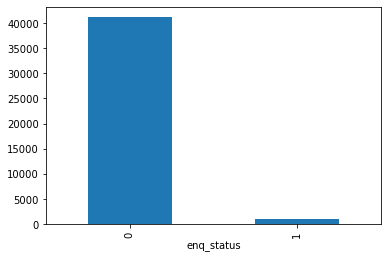

In [73]:
%matplotlib inline

lead_highgrove_status.groupby(['enq_status']).size().plot(kind='bar')

In [74]:
lead_highgrove_status.to_excel("C:\\Users\\118183\\Documents\\2019\\Model\\Lead_Conversion\\lead_highgrove1.xlsx", index=False)

In [42]:
crosstabresult=pd.crosstab(index=lead_highgrove_status['orginal_source'], columns=lead_highgrove_status['enq_status'])
crosstabresult

enq_status,0,1
orginal_source,,
Amratbhai,1,0
Bulk SMS,269,16
Channel Partner,2,6
Cross Project,214,0
Customer Referral,64,26
Database calling,1661,1
Direct Walk-in,519,69
Emailers,327,0
Employee Referral,142,44


In [50]:
filtercondition1 = lead_highgrove_status['orginal_source'].isin(['Bulk SMS']).values
filtercondition2 = lead_highgrove_status['orginal_source'].isin(['Channel Partner']).values
filtercondition3 = lead_highgrove_status['orginal_source'].isin(['Customer Referral	']).values
filtercondition4 = lead_highgrove_status['orginal_source'].isin(['Direct Walk-in']).values
filtercondition5 = lead_highgrove_status['orginal_source'].isin(['Employee Referral']).values
filtercondition6 = lead_highgrove_status['orginal_source'].isin(['Facebook']).values
filtercondition7 = lead_highgrove_status['orginal_source'].isin(['Google Adwords']).values
filtercondition8 = lead_highgrove_status['orginal_source'].isin(['Hoarding']).values
filtercondition9 = lead_highgrove_status['orginal_source'].isin(['Loyalty']).values
filtercondition10 = lead_highgrove_status['orginal_source'].isin(['Newspaper Ad']).values
filtercondition11 = lead_highgrove_status['orginal_source'].isin(['Property Consultant']).values
filtercondition12 = lead_highgrove_status['orginal_source'].isin(['Property Portal']).values
filtercondition13 = lead_highgrove_status['orginal_source'].isin(['SMS']).values
filtercondition14 = lead_highgrove_status['orginal_source'].isin(['Website']).values
filtercondition15 = lead_highgrove_status['orginal_source'].isin(['Word of Mouth']).values

In [51]:
lead_highgrove_status_1 = lead_highgrove_status[filtercondition1 | filtercondition10 | filtercondition2 | filtercondition3 | filtercondition4 | filtercondition5 | filtercondition6 | filtercondition7 | filtercondition8 | filtercondition9 | filtercondition11 | filtercondition12 | filtercondition13 | filtercondition14 | filtercondition15]

In [52]:
lead_highgrove_status_1.head()

,enq_created_date,enq_status,orginal_source,enq_source,enq_last_modified_date,CP_Name,CP_org_name,project,customer_name,enq_id,mobile
0,11/2/2020,0,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
1,23/9/2020,0,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842
2,20/10/2020,0,Hoarding,Hoarding,22/2/2021,NaN,NaN,Arvind Highgrove,Mr. Daheri Lal,ENQ - 00114748,916353205443
3,11/2/2020,0,Newspaper Ad,Newspaper Ad,22/4/2021,NaN,NaN,Arvind Highgrove,Mr. Nipan .,ENQ - 00001079,919825109070
4,23/9/2020,0,Facebook,Facebook,12/3/2021,NaN,NaN,Arvind Highgrove,Mr. Nancy Sharma,ENQ - 00107894,917042713842


In [53]:
lead_highgrove_status_1.shape

(38379, 11)

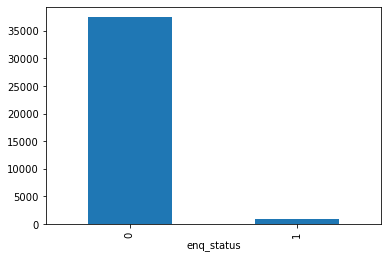

In [55]:
%matplotlib inline

lead_highgrove_status_1.groupby(['enq_status']).size().plot(kind='bar')

In [56]:
crosstabresult = pd.crosstab(index=lead_highgrove_status_1['orginal_source'], columns=lead_highgrove_status_1['enq_status'])
crosstabresult

enq_status,0,1
orginal_source,,
Bulk SMS,269,16
Channel Partner,2,6
Direct Walk-in,519,69
Employee Referral,142,44
Facebook,22983,161
Google Adwords,2436,20
Hoarding,1635,46
Loyalty,384,12
Newspaper Ad,936,14


In [57]:
lead_highgrove_status_1.to_excel("C:\\Users\\118183\\Documents\\2019\\Model\\Lead_Conversion\\lead_highgrove.xlsx", index=False)

In [83]:
lead_highgrove_clean = pd.read_excel("C:\\Users\\118183\\Documents\\2019\\Model\\Lead_Conversion\\lead_highgrove_final.xlsx")

In [84]:
lead_highgrove_clean.head()

,enq_created_date,enq_status,orginal_source,enq_source,enq_last_modified_date,CP_Name,CP_org_name,project,customer_name,enq_id,mobile
0,2020-11-30,1,Property Consultant,Property Consultant,12/6/2021,Jitendra Bhagnani,UMESHKUMAR BHAGLANI,Arvind Highgrove,Mrs. Gandhi Salooni Varun,ENQ - 00126203,00919638073331
1,2020-09-26,1,Property Consultant,Property Consultant,4/6/2021,Pranav Gadhiya,Pranav Gadhiya,Arvind Highgrove,Mr. LALIT TYAGI .,ENQ - 00108903,07622012101
2,2020-09-26,1,Property Consultant,Property Consultant,4/6/2021,Pranav Gadhiya,Pranav Gadhiya,Arvind Highgrove,Mr. LALIT TYAGI .,ENQ - 00108903,07622012101
3,2020-10-10,1,Property Consultant,Property Consultant,12/6/2021,Prashant Gajjar,KUNVARJI REALTY BROKERS,Arvind Highgrove,Mr. K M Sharma,ENQ - 00112560,07929701996
4,2020-10-10,1,Property Consultant,Property Consultant,12/6/2021,Prashant Gajjar,KUNVARJI REALTY BROKERS,Arvind Highgrove,Mr. K M Sharma,ENQ - 00112560,07929701996


In [85]:
lead_highgrove_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3785 entries, 0 to 3784
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   enq_created_date        3785 non-null   datetime64[ns]
 1   enq_status              3785 non-null   int64         
 2   orginal_source          3722 non-null   object        
 3   enq_source              3744 non-null   object        
 4   enq_last_modified_date  3785 non-null   object        
 5   CP_Name                 512 non-null    object        
 6   CP_org_name             515 non-null    object        
 7   project                 3785 non-null   object        
 8   customer_name           3785 non-null   object        
 9   enq_id                  3785 non-null   object        
 10  mobile                  3784 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 325.4+ KB


In [86]:
lead_highgrove_clean.nunique()

enq_created_date           203
enq_status                   2
orginal_source              21
enq_source                  18
enq_last_modified_date     223
CP_Name                     50
CP_org_name                 45
project                      1
customer_name             1144
enq_id                    1157
mobile                    1154
dtype: int64

In [87]:
useless_columns = ['enq_last_modified_date', 'project', 'customer_name', 'enq_id', 'mobile', 'CP_Name', 'CP_org_name']

lead_highgrove_clean.drop(useless_columns,axis=1, inplace=True )

In [88]:
lead_highgrove_clean.head()

,enq_created_date,enq_status,orginal_source,enq_source
0,2020-11-30,1,Property Consultant,Property Consultant
1,2020-09-26,1,Property Consultant,Property Consultant
2,2020-09-26,1,Property Consultant,Property Consultant
3,2020-10-10,1,Property Consultant,Property Consultant
4,2020-10-10,1,Property Consultant,Property Consultant


In [93]:
lead_highgrove_clean['day'] = lead_highgrove_clean['enq_created_date'].dt.day

In [90]:
lead_highgrove_clean.head()

,enq_created_date,enq_status,orginal_source,enq_source,day
0,2020-11-30,1,Property Consultant,Property Consultant,30
1,2020-09-26,1,Property Consultant,Property Consultant,26
2,2020-09-26,1,Property Consultant,Property Consultant,26
3,2020-10-10,1,Property Consultant,Property Consultant,10
4,2020-10-10,1,Property Consultant,Property Consultant,10


In [94]:
lead_highgrove_clean['week']= lead_highgrove_clean['enq_created_date'].dt.week
lead_highgrove_clean['weekday']=lead_highgrove_clean['enq_created_date'].dt.dayofweek

In [95]:
lead_highgrove_clean.head()

,enq_created_date,enq_status,orginal_source,enq_source,day,week,weekday
0,2020-11-30,1,Property Consultant,Property Consultant,30,49,0
1,2020-09-26,1,Property Consultant,Property Consultant,26,39,5
2,2020-09-26,1,Property Consultant,Property Consultant,26,39,5
3,2020-10-10,1,Property Consultant,Property Consultant,10,41,5
4,2020-10-10,1,Property Consultant,Property Consultant,10,41,5


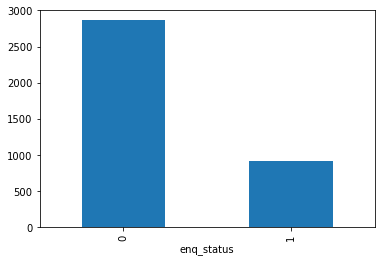

In [96]:
lead_highgrove_clean.groupby(['enq_status']).size().plot(kind='bar')

In [98]:
lead_highgrove_clean.drop(['enq_created_date'],axis=1, inplace= True)

In [99]:
lead_highgrove_clean.head()

,enq_status,orginal_source,enq_source,day,week,weekday
0,1,Property Consultant,Property Consultant,30,49,0
1,1,Property Consultant,Property Consultant,26,39,5
2,1,Property Consultant,Property Consultant,26,39,5
3,1,Property Consultant,Property Consultant,10,41,5
4,1,Property Consultant,Property Consultant,10,41,5


## VAriable types

In [100]:
lead_highgrove_clean.nunique()

enq_status         2
orginal_source    21
enq_source        18
day               31
week              40
weekday            7
dtype: int64

In [101]:
# enq_status = Target variable
# orginal_source = categorical
# enq_source = categorical
# day = categorical
#week = categorical
#weekday = categorical

In [108]:
def plotbarcharts(inpdata, colstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subplot = plt.subplots(nrows=1, ncols=len(colstoplot))
    
    fig.suptitle("Bar charts of "+ str(colstoplot))
    
    for predictor, i in zip(colstoplot, range(len(colstoplot))):
        inpdata.groupby(predictor).size().plot(kind='bar', ax = subplot[i], figsize=(20, 10))

In [109]:
lead_highgrove_clean.columns

Index(['enq_status', 'orginal_source', 'enq_source', 'day', 'week', 'weekday'], dtype='object')

In [110]:
catcols = ['orginal_source', 'enq_source', 'day', 'week', 'weekday']

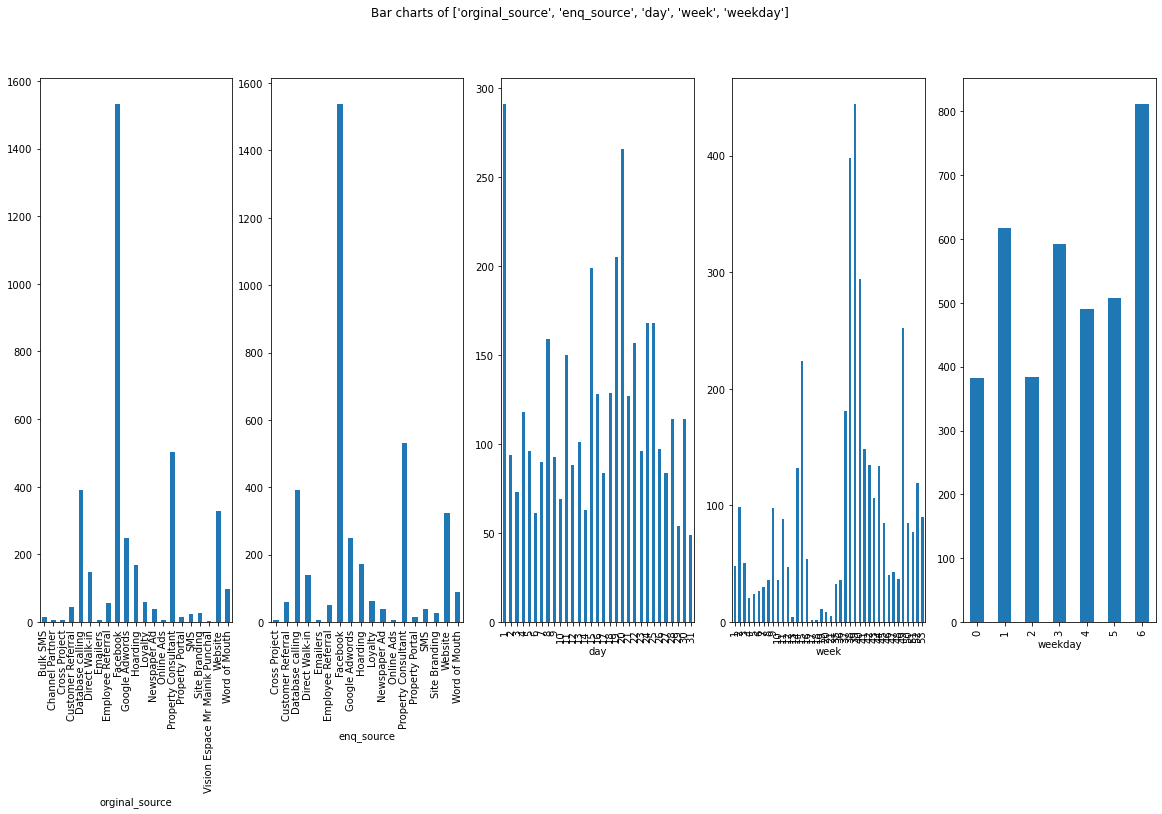

In [111]:
plotbarcharts(lead_highgrove_clean, catcols)

In [112]:
lead_highgrove_clean.isna().sum()

enq_status         0
orginal_source    63
enq_source        41
day                0
week               0
weekday            0
dtype: int64

In [114]:
lead_highgrove_clean['orginal_source'].fillna(lead_highgrove_clean['orginal_source'].mode()[0], inplace=True)

lead_highgrove_clean['enq_source'].fillna(lead_highgrove_clean['enq_source'].mode()[0], inplace=True)

In [115]:
lead_highgrove_clean.isna().sum()

enq_status        0
orginal_source    0
enq_source        0
day               0
week              0
weekday           0
dtype: int64

In [116]:
catcols

['orginal_source', 'enq_source', 'day', 'week', 'weekday']

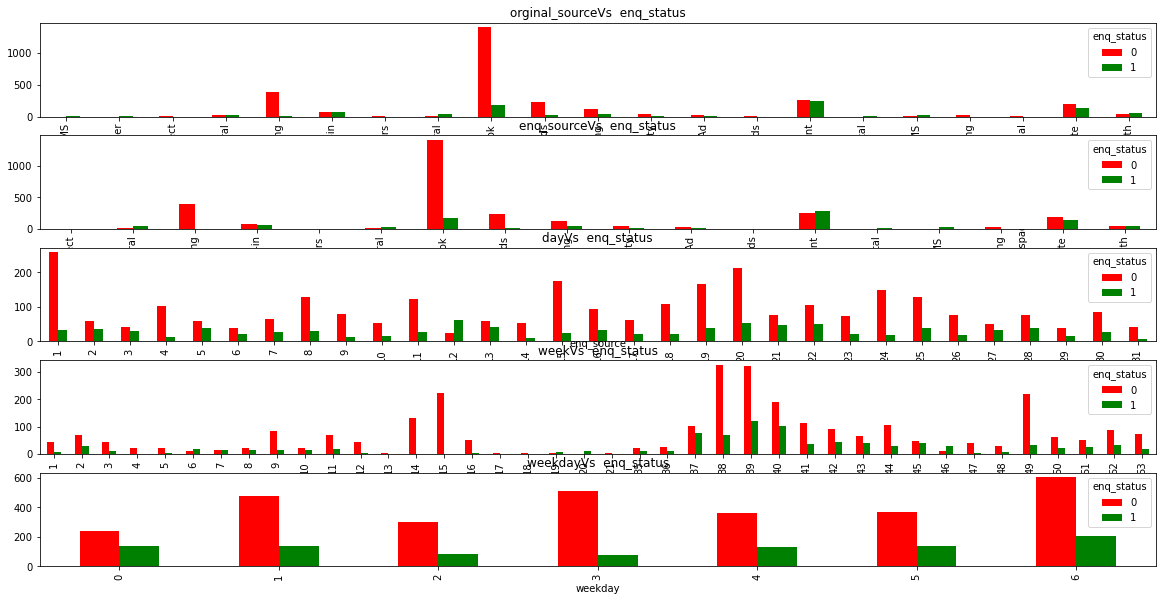

In [118]:
import matplotlib.pyplot as plt

fig, subplot = plt.subplots(nrows=len(catcols), ncols=1, figsize=(20,10))

for predictor, i in zip(catcols, range(len(catcols))):
    crosstabresult=pd.crosstab(index=lead_highgrove_clean[predictor], columns=lead_highgrove_clean['enq_status'])
    crosstabresult.plot.bar(color = ['red', 'green'], ax=subplot[i], title = predictor + 'Vs ' + ' enq_status')

## Chi Square test

In [119]:
def chifunction(inpdata, targetvariable, catcols):
    from scipy.stats import chi2_contingency
    
    selectedpredictors = []

    
    for predictor in catcols:
        crosstabresult = pd.crosstab(index=inpdata[targetvariable], columns=inpdata[predictor])
        chi2result = chi2_contingency(crosstabresult)
        
        if (chi2result[1] < 0.05):
            print(predictor, "is correlated with ",targetvariable, " |P Value is", chi2result[1] )
            selectedpredictors.append(predictor)
        else:
            print(predictor, "is not correlated with ", targetvariable, " P| value is ", chi2result[1])
            
    return(selectedpredictors)

In [120]:
targetvar = 'enq_status'

In [121]:
chifunction(lead_highgrove_clean, targetvar, catcols)

orginal_source is correlated with  enq_status  |P Value is 2.2582973788076272e-178
enq_source is correlated with  enq_status  |P Value is 3.050469071111938e-190
day is correlated with  enq_status  |P Value is 6.586367245867435e-45
week is correlated with  enq_status  |P Value is 1.2998596297610043e-65
weekday is correlated with  enq_status  |P Value is 1.2842118824900586e-14


['orginal_source', 'enq_source', 'day', 'week', 'weekday']

In [122]:
selectedcols = ['orginal_source', 'enq_source', 'day', 'week', 'weekday']

In [123]:
dataforml = lead_highgrove_clean[selectedcols]

In [124]:
dataforml.head()

,orginal_source,enq_source,day,week,weekday
0,Property Consultant,Property Consultant,30,49,0
1,Property Consultant,Property Consultant,26,39,5
2,Property Consultant,Property Consultant,26,39,5
3,Property Consultant,Property Consultant,10,41,5
4,Property Consultant,Property Consultant,10,41,5


In [125]:
dataforml_num = pd.get_dummies(dataforml)

In [126]:
dataforml_num.head()

,day,week,weekday,orginal_source_Bulk SMS,orginal_source_Channel Partner,orginal_source_Cross Project,orginal_source_Customer Referral,orginal_source_Database calling,orginal_source_Direct Walk-in,orginal_source_Emailers,...,enq_source_Hoarding,enq_source_Loyalty,enq_source_Newspaper Ad,enq_source_Online Ads,enq_source_Property Consultant,enq_source_Property Portal,enq_source_SMS,enq_source_Site Branding,enq_source_Website,enq_source_Word of Mouth
0,30,49,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,26,39,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,26,39,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,10,41,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,10,41,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [128]:
dataforml_num.columns

Index(['day', 'week', 'weekday', 'orginal_source_Bulk SMS',
       'orginal_source_Channel Partner', 'orginal_source_Cross Project',
       'orginal_source_Customer Referral', 'orginal_source_Database calling',
       'orginal_source_Direct Walk-in', 'orginal_source_Emailers',
       'orginal_source_Employee Referral', 'orginal_source_Facebook',
       'orginal_source_Google Adwords', 'orginal_source_Hoarding',
       'orginal_source_Loyalty', 'orginal_source_Newspaper Ad',
       'orginal_source_Online Ads', 'orginal_source_Property Consultant',
       'orginal_source_Property Portal', 'orginal_source_SMS',
       'orginal_source_Site Branding',
       'orginal_source_Vision Espace Mr Mainik Punchal',
       'orginal_source_Website', 'orginal_source_Word of Mouth',
       'enq_source_Cross Project', 'enq_source_Customer Referral',
       'enq_source_Database calling', 'enq_source_Direct Walk-in',
       'enq_source_Emailers', 'enq_source_Employee Referral',
       'enq_source_Facebook

In [129]:
targetvar = 'enq_status'
predictors = ['day', 'week', 'weekday', 'orginal_source_Bulk SMS',
       'orginal_source_Channel Partner', 'orginal_source_Cross Project',
       'orginal_source_Customer Referral', 'orginal_source_Database calling',
       'orginal_source_Direct Walk-in', 'orginal_source_Emailers',
       'orginal_source_Employee Referral', 'orginal_source_Facebook',
       'orginal_source_Google Adwords', 'orginal_source_Hoarding',
       'orginal_source_Loyalty', 'orginal_source_Newspaper Ad',
       'orginal_source_Online Ads', 'orginal_source_Property Consultant',
       'orginal_source_Property Portal', 'orginal_source_SMS',
       'orginal_source_Site Branding',
       'orginal_source_Vision Espace Mr Mainik Punchal',
       'orginal_source_Website', 'orginal_source_Word of Mouth',
       'enq_source_Cross Project', 'enq_source_Customer Referral',
       'enq_source_Database calling', 'enq_source_Direct Walk-in',
       'enq_source_Emailers', 'enq_source_Employee Referral',
       'enq_source_Facebook', 'enq_source_Google Adwords',
       'enq_source_Hoarding', 'enq_source_Loyalty', 'enq_source_Newspaper Ad',
       'enq_source_Online Ads', 'enq_source_Property Consultant',
       'enq_source_Property Portal', 'enq_source_SMS',
       'enq_source_Site Branding', 'enq_source_Website',
       'enq_source_Word of Mouth']

In [130]:
dataforml_num['enq_status']= lead_highgrove_clean['enq_status']

In [131]:
x = dataforml_num[predictors].values
y = dataforml_num[targetvar].values


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [133]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2649, 42)
(1136, 42)
(2649,)
(1136,)


## Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=5, penalty='l2', solver='newton-cg')

log = clf.fit(x_train, y_train)
prediction = log.predict(x_test)

from sklearn import metrics

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

f1_score = metrics.f1_score(y_test, prediction, average='weighted')
print("accuracy of the model on testing sample data: ", round(f1_score, 2))

from sklearn.model_selection import cross_val_score

accuracy_val = cross_val_score(log, x,y, cv=10, scoring='f1_weighted')

print("\n Accuracy values of 10 fold CV : \n", accuracy_val)
print("\n Average accuracy of model: \n", np.mean(accuracy_val))



              precision    recall  f1-score   support

           0       0.83      0.92      0.88       866
           1       0.62      0.41      0.49       270

    accuracy                           0.80      1136
   macro avg       0.73      0.67      0.68      1136
weighted avg       0.78      0.80      0.78      1136

[[798 159]
 [ 68 111]]
accuracy of the model on testing sample data:  0.78

 Accuracy values of 10 fold CV : 
 [0.80001728 0.74464183 0.75006304 0.72876406 0.74589475 0.65725024
 0.7716178  0.73047122 0.82154587 0.77055897]

 Average accuracy of model: 
 0.7520825057129604
